In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot #used data visualization
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns #used for EDA graphs 
pd.options.display.float_format = '{:.2f}'.format #to display the float data upto 2 decimal points
import warnings
warnings.filterwarnings('ignore') #never print matching warnings if exists

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Statistical and general information about the dataset:**

In [3]:
ds = pd.read_csv('/content/drive/MyDrive/heart.csv') #read the data from heart.csv file
ds.head()                     #to display first 5 rows of the dataset, to check the features and their values in dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


To get a brief information on the dataset such as count of rows, column, datatype, presence of null values: 

In [77]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


*Obervation:* *We have 918 rows and 12 columns, no null values, 3 datatypes: int/float/object*

To compute the count, mean, standard deviation, minimum and maximum values and the quantiles of the data:

In [78]:
ds.describe().style.background_gradient(cmap='Blues')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


*Observation: The data is less divergent than the arithmetic mean relative to the target (HeartDisease) because The higher the standard deviation value, the greater the divergence of the data from the arithmetic mean, and the smaller the standard deviation, the less data from the arithmetic mean.(didn't understand this!!!)*

For the two main cases: Heart Disease and No Heart Disease, mean values of each features:

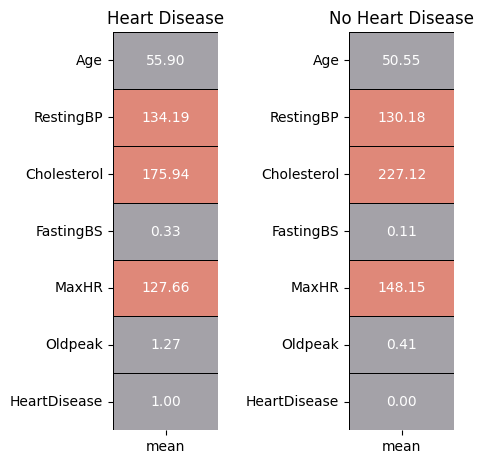

In [79]:
y = ds[ds['HeartDisease'] == 1].describe().T
n = ds[ds['HeartDisease'] == 0].describe().T

figure,axis = plot.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plot.subplot(1,2,1)
sns.heatmap(y[['mean']],annot = True,cmap = ['#a4a2a8','#df8879'],linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plot.title('Heart Disease');

plot.subplot(1,2,2)
sns.heatmap(n[['mean']],annot = True,cmap = ['#a4a2a8','#df8879'],linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plot.title('No Heart Disease');

figure.tight_layout(pad = 2)

**Exploratory Data Analysis (EDA):**

To check the number of unique values present in the data:

In [80]:
ds.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Division of Categorial and Numerical features of the dataset:

In [81]:
columns = list(ds.columns)
categorical = []
numerical = []
for i in columns:
    if len(ds[i].unique()) > 6:
        numerical.append(i)
    else:
        categorical.append(i)

print(pd.DataFrame(categorical, columns=['Categorial Features']))
print()
print(pd.DataFrame(numerical, columns=['Numerical Features']))

  Categorial Features
0                 Sex
1       ChestPainType
2           FastingBS
3          RestingECG
4      ExerciseAngina
5            ST_Slope
6        HeartDisease

  Numerical Features
0                Age
1          RestingBP
2        Cholesterol
3              MaxHR
4            Oldpeak


*observation: 
datatype = integer, feature type = numerical feature;
datatype = string, feature type = categorical feature*

Categorical Features:

Scaling the categorial data by computing the mean and std dev for each feature

In [82]:
le = LabelEncoder()
ds_copy = ds.copy(deep = True)

ds_copy['Sex'] = le.fit_transform(ds_copy['Sex'])
ds_copy['ChestPainType'] = le.fit_transform(ds_copy['ChestPainType'])
ds_copy['RestingECG'] = le.fit_transform(ds_copy['RestingECG'])
ds_copy['ExerciseAngina'] = le.fit_transform(ds_copy['ExerciseAngina'])
ds_copy['ST_Slope'] = le.fit_transform(ds_copy['ST_Slope'])

*Observation:*

*   *Here we created a copy of the original dataset so that modification in this would not be reflected in the original dataset*
*   *It is done so to convert all the features into numeric value form for data visualization and modeling*


In [83]:
ds_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


Visualization of distribution of categorical features:

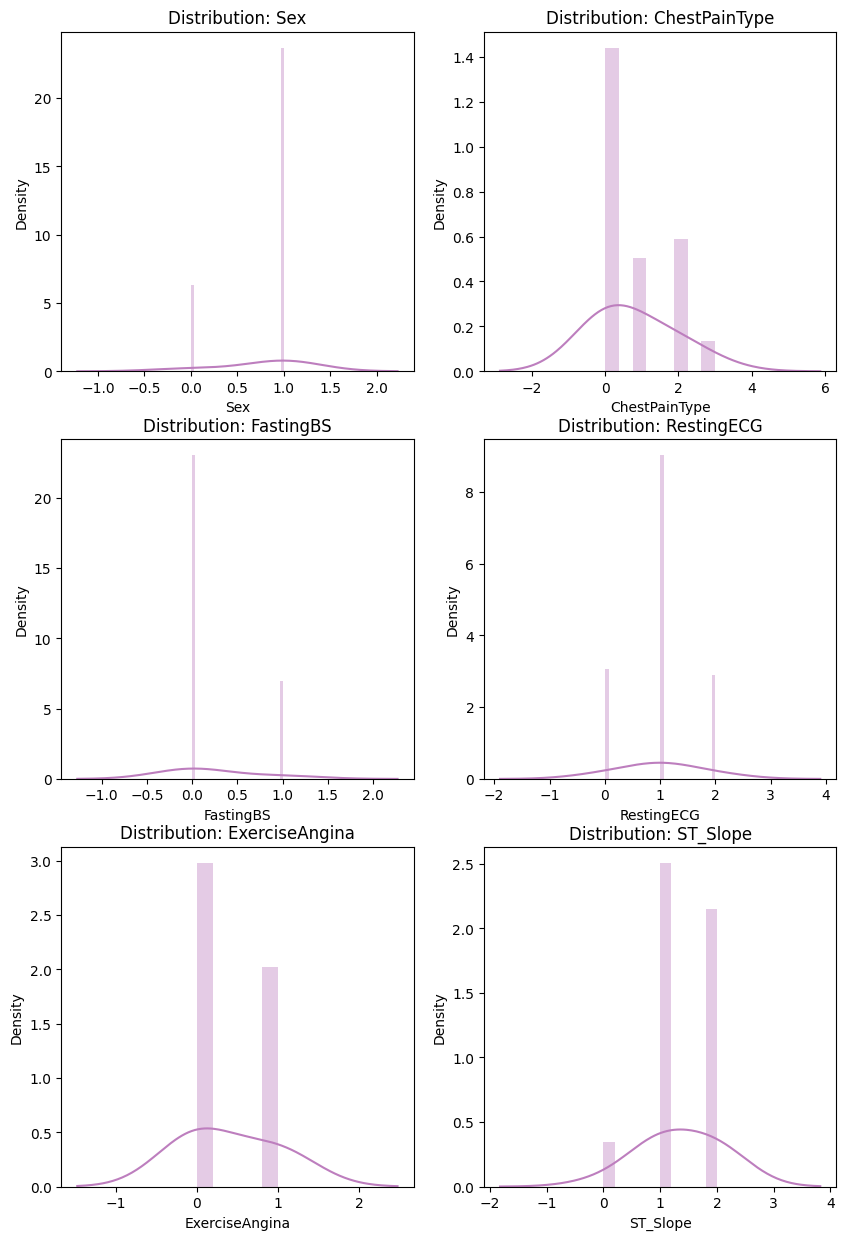

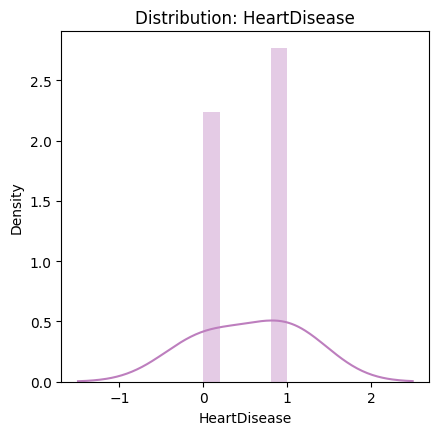

In [84]:
figure, axis = plot.subplots(nrows = 3,ncols = 2,figsize = (10,15))

for i in range(len(categorical) - 1):    
    plot.subplot(3,2,i+1)
    sns.distplot(ds_copy[categorical[i]],kde_kws = {'bw' : 1},color = '#bd7ebe');
    categorial_title = 'Distribution: ' + categorical[i]
    plot.title(categorial_title)
    
plot.figure(figsize = (4.75,4.55))
sns.distplot(ds_copy[categorical[len(categorical) - 1]],kde_kws = {'bw' : 1},color = '#bd7ebe')
categorial_title = 'Distribution: ' + categorical[len(categorical) - 1]
plot.title(categorial_title);

*Observation: We can see that the categorial feature data is almost nearly normally distributed*

Visualization of distribution of numerical features:

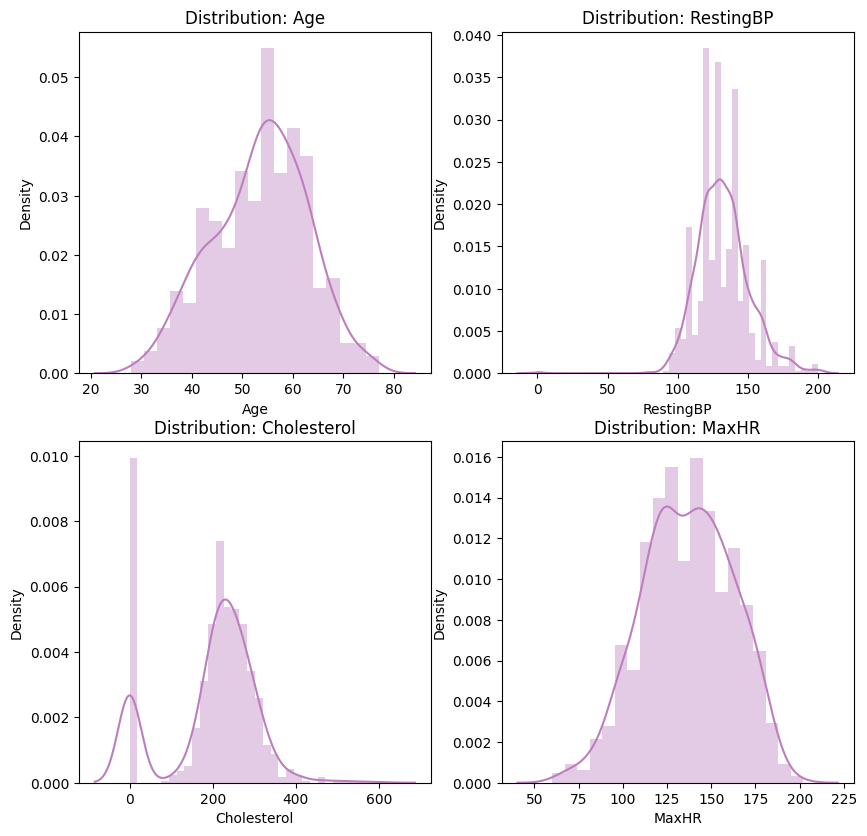

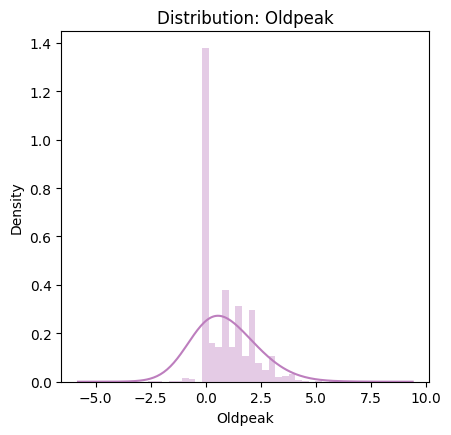

In [85]:
figure, axis = plot.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical) - 1):
    plot.subplot(2,2,i+1)
    sns.distplot(ds[numerical[i]],color = '#bd7ebe')
    numerical_title = 'Distribution: ' + numerical[i]
    plot.title(numerical_title)
plot.show()

plot.figure(figsize = (4.75,4.55))
sns.distplot(ds[numerical[len(numerical) - 1]],kde_kws = {'bw' : 1},color = '#bd7ebe')
numerical_title = 'Distribution: ' + numerical[len(numerical) - 1]
plot.title(numerical_title);

*Observation: Here, data distribution for Oldpeak is biased towards the right and data distribution for cholestrol is bimodel*

Visualization of distribution of target feature i.e. Heart Diease:

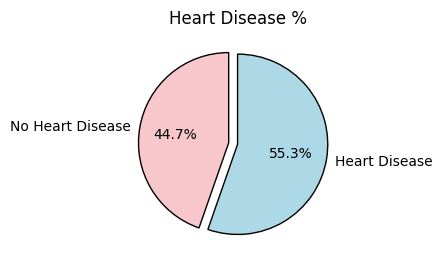

In [86]:
l = list(ds['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

plot.subplot(1,2,1)
plot.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = ['#F8C7CC', '#ADD8E6'],wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plot.title('Heart Disease %');

Distribution of Heat Diseases with respect to male and female:

In [87]:
figure = px.histogram(ds, 
                 x="HeartDisease",
                 color="Sex",
                 color_discrete_sequence=['#F8C7CC', '#ADD8E6'],
                 hover_data=ds.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
figure.show()

Distribution of type of chest pain w.r.t male and female:

In [ ]:
figure = px.histogram(ds,
                 x="ChestPainType",
                 color="Sex",
                 color_discrete_sequence=['#F8C7CC', '#ADD8E6'],
                 hover_data=ds.columns,
                 title="Types of Chest Pain")
figure.show()

Distribution of male and female in the dataset:

In [ ]:
figure = px.histogram(ds,
                 x="Sex",
                 color_discrete_sequence=['#ADD8E6'],
                 hover_data=ds.columns,
                 title="Gender Ratio in the Data")
figure.show()

Dsitribution of RestingECG feature:

In [ ]:
figure = px.histogram(ds,
                 x="RestingECG",
                 hover_data=ds.columns,
                 color_discrete_sequence=['#ADD8E6'],
                 title="Distribution of Resting ECG")
figure.show()

*   Creating a matrix of plots that shows the relationship between multiple pairs of features in a dataset.
*   Here we are ploting all possible combinations of pairs of features as a matrix of plots.
*   The diagonal plots show the distribution of each individual feature.

[]

<Figure size 1500x1000 with 0 Axes>

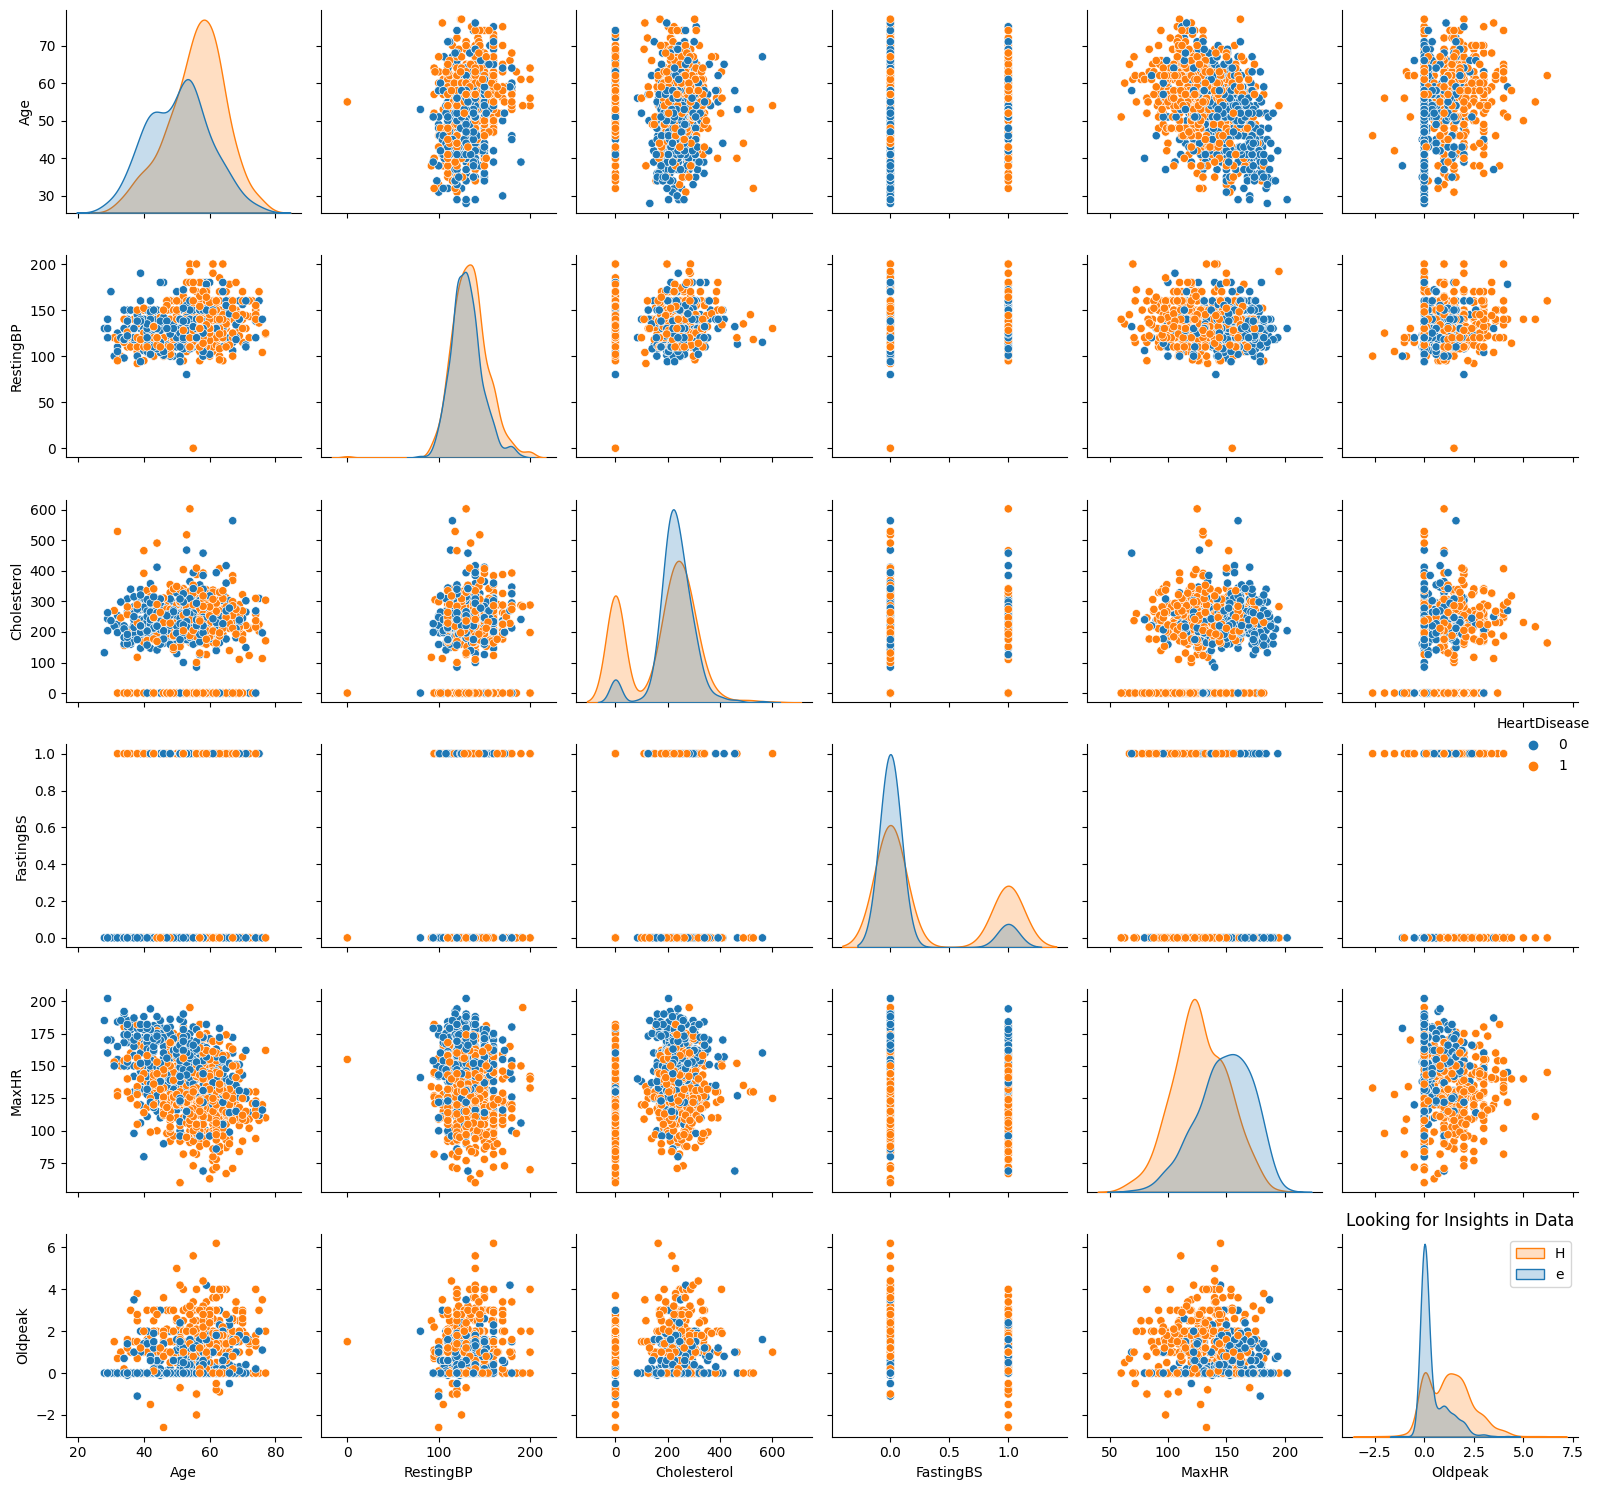

In [ ]:
plot.figure(figsize=(15,10))
sns.pairplot(ds,hue="HeartDisease")
plot.title("Looking for Insights in Data")
plot.legend("HeartDisease")
plot.tight_layout()
plot.plot()

**Feature Engineering/Selection:**

Data Scaling:

In [6]:
nl = MinMaxScaler() #Normalization
st = StandardScaler() #Standardization

ds_copy['Oldpeak'] = nl.fit_transform(ds_copy[['Oldpeak']])
ds_copy['Age'] = st.fit_transform(ds_copy[['Age']])
ds_copy['RestingBP'] = st.fit_transform(ds_copy[['RestingBP']])
ds_copy['Cholesterol'] = st.fit_transform(ds_copy[['Cholesterol']])
ds_copy['MaxHR'] = st.fit_transform(ds_copy[['MaxHR']])
ds_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


*Observation:*


*   *Normalization: The Oldpeak feature was normalized because it had a right-skewed distribution. This means that the data was shifted towards higher values, so normalization was used to adjust the data to a more standard distribution.*

*   *Standardization: The Age, RestingBP, Cholesterol, and MaxHR features were standardized because they had a normal distribution. This means that the data was evenly spread out around the mean, so standardization was used to scale down the data and make it easier to compare across features.*


Correlation Matrix:

*   Lighter shades represents positive correlation
*   Darker shades represents negative correlation

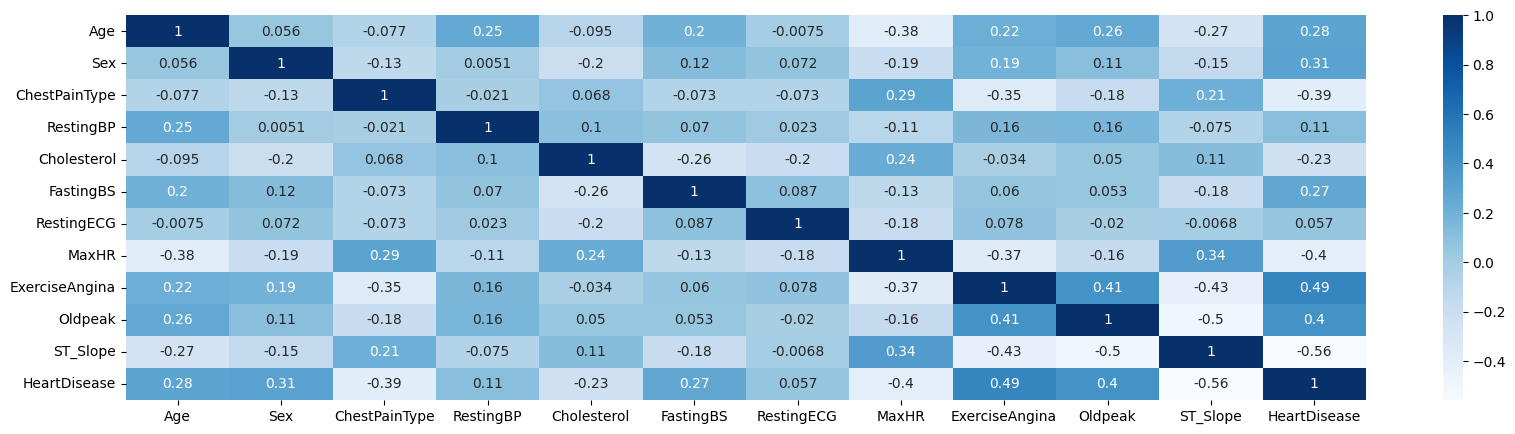

In [ ]:
plot.figure(figsize = (20,5))
sns.heatmap(ds_copy.corr(),cmap = "Blues", annot = True);

*Observation: The matrix contains a large number of features. Hence now, we are only examining the correlation between the features and HeartDisease.*

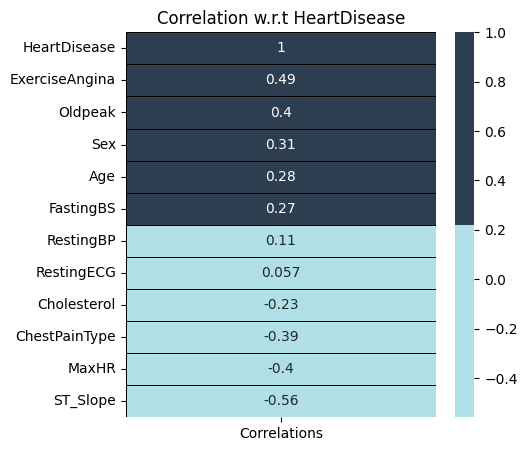

In [ ]:
correration = ds_copy.corrwith(ds_copy['HeartDisease']).sort_values(ascending = False).to_frame()
correration.columns = ['Correlations']
plot.subplots(figsize = (5,5))
sns.heatmap(correration,annot = True,cmap = ['#B0E0E6','#2C3E50'],linewidths = 0.4,linecolor = 'black');
plot.title('Correlation w.r.t HeartDisease');

Feature Selection for Categorical Features using Chi-Squared test:

Text(0.5, 1.0, 'Selection of Categorical Features')

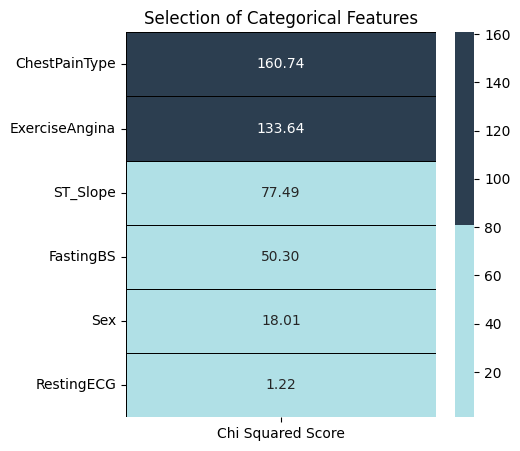

In [ ]:
features = ds_copy.loc[:,categorical[:-1]]
target = ds_copy.loc[:,categorical[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plot.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = ['#B0E0E6','#2C3E50'],linewidths = 0.4,linecolor = 'black',fmt = '.2f')
plot.title('Selection of Categorical Features')

*Observation: All of the following category features—aside from RestingECG—are significant for predicting heart disease*

Feature Selection for Numerical Features using ANOVA test:

Text(0.5, 1.0, 'Selection of Numerical Features')

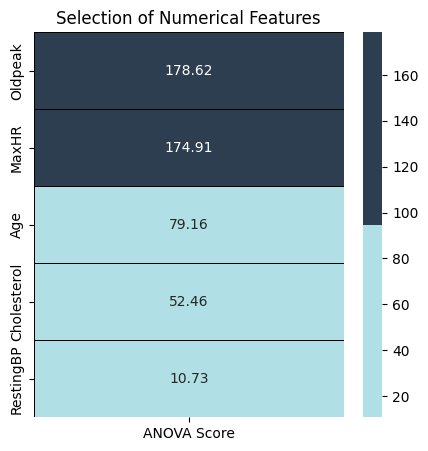

In [ ]:
features = ds_copy.loc[:,numerical]
target = ds_copy.loc[:,categorical[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plot.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = ['#B0E0E6','#2C3E50'],linewidths = 0.4,linecolor = 'black',fmt = '.2f')
plot.title('Selection of Numerical Features')

*Observation: Therefore from above two tests we conclude to keep out RestingBP feature from model training and testing and consider the remaining features (since it had the lowest score)*

**Modeling:**

Splitting the data into test and train subsets:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

*   Removing the features that don't have much contribution in the modeling/prediction (RestingBP and RestingECG).
*   After selecting the features, splitting the data as 80% - train and 20% test data.



In [53]:
ds_copy.dropna()
features1 = ds_copy[ds_copy.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])].values #CASE 1: data without RestingBP and RestingECG
features2 = ds_copy[ds_copy.columns.drop(['HeartDisease','RestingBP'])].values  #CASE 2: data without RestingBP
features3 = ds_copy[ds_copy.columns.drop(['HeartDisease','RestingECG'])].values #CASE 3: data without RestingECG
features4 = ds_copy[ds_copy.columns.drop(['HeartDisease'])].values  #CASE 4: data with all 11 features

target_feature = ds_copy['HeartDisease'].values
x_train1, x_test1, y_train1, y_test1 = train_test_split(features1, target_feature, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, target_feature, test_size = 0.20, random_state = 2)
x_train3, x_test3, y_train3, y_test3 = train_test_split(features3, target_feature, test_size = 0.20, random_state = 2)
x_train4, x_test4, y_train4, y_test4 = train_test_split(features4, target_feature, test_size = 0.20, random_state = 2)

In [ ]:
ds_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


CASE 1: Accuracy of the model after removing RestingBP and RestingECG

In [9]:
def model_accuracy1(model):    
    model.fit(x_train1,y_train1)
    prediction = model.predict(x_test1)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Train Accuracy:",'{0:.2%}'.format(model.score(x_train1,y_train1)))
    print("Test Accuracy: ",'{0:.2%}'.format(accuracy_score(y_test1,prediction)))
    print("Cross Validation Score: ",'{0:.2%}'.format(cross_val_score(model,x_train1,y_train1,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score: ",'{0:.2%}'.format(roc_auc_score(y_test1,prediction)))


CASE 2: Accuracy of the model after removing RestingBP

In [13]:
def model_accuracy2(model):    
    model.fit(x_train2,y_train2)
    prediction = model.predict(x_test2)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Train Accuracy:",'{0:.2%}'.format(model.score(x_train2,y_train2)))
    print("Test Accuracy: ",'{0:.2%}'.format(accuracy_score(y_test2,prediction)))
    print("Cross Validation Score: ",'{0:.2%}'.format(cross_val_score(model,x_train2,y_train2,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score: ",'{0:.2%}'.format(roc_auc_score(y_test2,prediction)))


CASE 3: Accuracy of the model after removing RestingECG

In [15]:
def model_accuracy3(model):    
    model.fit(x_train3,y_train3)
    prediction = model.predict(x_test3)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Train Accuracy:",'{0:.2%}'.format(model.score(x_train3,y_train3)))
    print("Test Accuracy: ",'{0:.2%}'.format(accuracy_score(y_test3,prediction)))
    print("Cross Validation Score: ",'{0:.2%}'.format(cross_val_score(model,x_train3,y_train3,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score: ",'{0:.2%}'.format(roc_auc_score(y_test3,prediction)))


CASE 4: Accuracy of the model with all 11 features

In [16]:
def model_accuracy4(model):    
    model.fit(x_train4,y_train4)
    prediction = model.predict(x_test4)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Train Accuracy:",'{0:.2%}'.format(model.score(x_train4,y_train4)))
    print("Test Accuracy: ",'{0:.2%}'.format(accuracy_score(y_test4,prediction)))
    print("Cross Validation Score: ",'{0:.2%}'.format(cross_val_score(model,x_train4,y_train4,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score: ",'{0:.2%}'.format(roc_auc_score(y_test4,prediction)))


Evaluation of the model:

In [26]:
def model_evaluation(model):    
    cm = confusion_matrix(y_test1,model.predict(x_test1))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = ['#F8C7CC','#ADD8E6'],fmt ='')
    
    print(classification_report(y_test1,model.predict(x_test1)))

In [ ]:
target_feature.shape

(918,)

In [10]:
print(x_train1.shape)
print(y_train1.shape)

if y_train1.shape[0] != x_train1.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(734, 9)
(734,)


1. Logistic Regression Model:

In [11]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

In [33]:
model_accuracy1(lr_model) #without RestingECG and RestingBP

Train Accuracy: 85.97%
Test Accuracy:  87.50%
Cross Validation Score:  91.12%
ROC_AUC Score:  87.43%


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



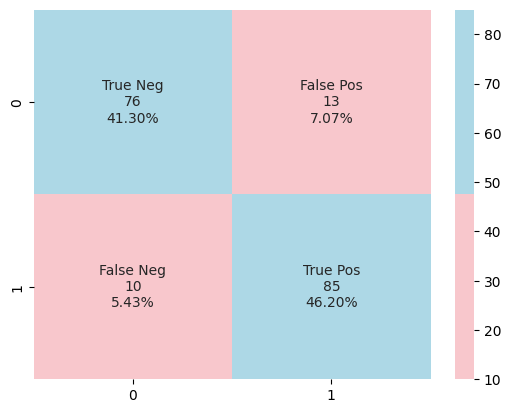

In [34]:
model_evaluation(lr_model) #without RestingECG and RestingBP

In [35]:
model_accuracy2(lr_model) #without RestingBP

Train Accuracy: 85.97%
Test Accuracy:  86.41%
Cross Validation Score:  91.21%
ROC_AUC Score:  86.35%


In [30]:
model_accuracy3(lr_model) #without RestingECG

Train Accuracy: 85.83%
Test Accuracy:  86.41%
Cross Validation Score:  91.09%
ROC_AUC Score:  86.31%


In [31]:
model_accuracy4(lr_model) #with all 11 features

Train Accuracy: 86.24%
Test Accuracy:  84.24%
Cross Validation Score:  91.08%
ROC_AUC Score:  84.13%


2. Decision Tree using XGBoost:

In [36]:
import xgboost as xgb
from sklearn import ensemble
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ds_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0




*   Preparing the data for model feeding.
*   Define the XGBoost regressor according to your specifications.



In [37]:
rForrest = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state=0)



*   Fitting the training data in the model.
*   Checking the score of the model on test data.



In [38]:
model_accuracy1(rForrest)  #without RestingECG and RestingBP

Train Accuracy: 91.14%
Test Accuracy:  84.78%
Cross Validation Score:  92.87%
ROC_AUC Score:  84.59%


              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



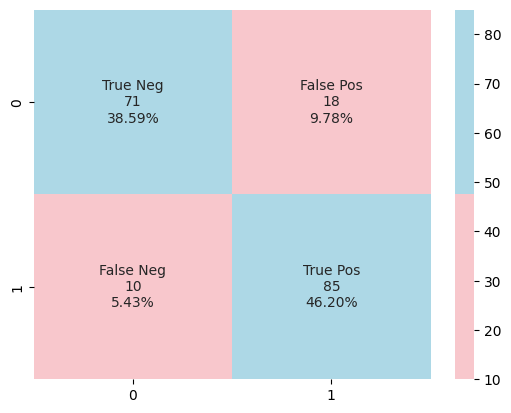

In [ ]:
model_evaluation(rForrest) #without RestingECG and RestingBP

In [39]:
model_accuracy2(rForrest)  #without RestingBP

Train Accuracy: 91.28%
Test Accuracy:  85.33%
Cross Validation Score:  93.06%
ROC_AUC Score:  85.19%


In [40]:
model_accuracy3(rForrest)  #without RestingECG

Train Accuracy: 91.01%
Test Accuracy:  83.70%
Cross Validation Score:  93.22%
ROC_AUC Score:  83.50%


In [41]:
model_accuracy4(rForrest)  #with all 11 features

Train Accuracy: 91.28%
Test Accuracy:  84.78%
Cross Validation Score:  93.15%
ROC_AUC Score:  84.62%


3. K-nearest Neighbors Classifier:

In [42]:
from sklearn.neighbors import KNeighborsClassifier

Methods to choose value of n_neighbors/k:

Method 1: Using the formula of k = sqrt(N) where N is the total number of sample in the training dataset

In [43]:
x_train1.shape

(734, 9)

In [44]:
k = np.sqrt(x_train1.shape[0])
print('k = ', k)

k =  27.09243436828813


Therefore, initially setting the value of k = 27:

In [45]:
k = 27

Training our knn model with n_neighbors = k:

In [46]:
knn_model = KNeighborsClassifier(leaf_size = 1,n_neighbors = k,p = 1)

In [47]:
model_accuracy1(knn_model) #without RestingECG and RestingBP

Train Accuracy: 87.87%
Test Accuracy:  84.78%
Cross Validation Score:  92.70%
ROC_AUC Score:  84.62%


              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



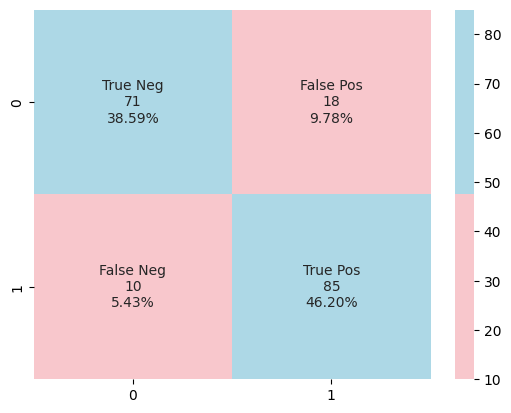

In [48]:
model_evaluation(knn_model) #without RestingECG and RestingBP

In [49]:
model_accuracy2(knn_model) #without RestingBP

Train Accuracy: 88.42%
Test Accuracy:  83.15%
Cross Validation Score:  92.64%
ROC_AUC Score:  83.01%


In [50]:
model_accuracy3(knn_model) #without RestingECG

Train Accuracy: 88.28%
Test Accuracy:  84.24%
Cross Validation Score:  92.60%
ROC_AUC Score:  84.13%


In [51]:
model_accuracy4(knn_model)  #with all 11 features

Train Accuracy: 87.60%
Test Accuracy:  84.78%
Cross Validation Score:  92.57%
ROC_AUC Score:  84.73%


Method 2: Now to check the accuracy of the model by using various other k values with trail and error

[0.7771739130434783, 0.7880434782608695, 0.7934782608695652, 0.8097826086956522, 0.8097826086956522, 0.8260869565217391, 0.8260869565217391, 0.8369565217391305, 0.8478260869565217, 0.8586956521739131, 0.8369565217391305, 0.8260869565217391, 0.842391304347826, 0.842391304347826, 0.842391304347826, 0.842391304347826, 0.842391304347826, 0.8315217391304348, 0.8369565217391305, 0.842391304347826, 0.8369565217391305, 0.8478260869565217, 0.842391304347826, 0.842391304347826, 0.8478260869565217, 0.8369565217391305, 0.842391304347826, 0.842391304347826, 0.842391304347826, 0.8478260869565217]


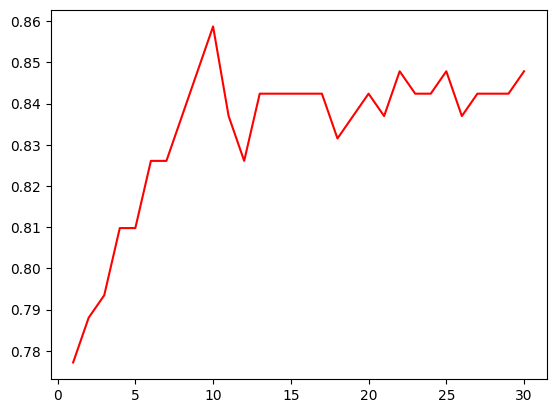

In [54]:
other_accuracy = []
for i in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train1,y_train1)
    other_accuracy.append(accuracy_score(y_test1,knn_model.predict(x_test1)))
    
plot.plot(range(1,31),other_accuracy,color = 'red')
print(other_accuracy)

*observation: From the above two methods we can conclude that when k = 10, model gives a better accuracy of 85.86% than when k = 27 which gave 84.78%*

In [63]:
knn_model = KNeighborsClassifier(leaf_size = 1,n_neighbors = 10,p = 1)

In [64]:
model_accuracy1(knn_model) #without RestingECG and RestingBP

Train Accuracy: 88.69%
Test Accuracy:  85.87%
Cross Validation Score:  91.67%
ROC_AUC Score:  85.75%


              precision    recall  f1-score   support

           0       0.88      0.82      0.85        89
           1       0.84      0.89      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



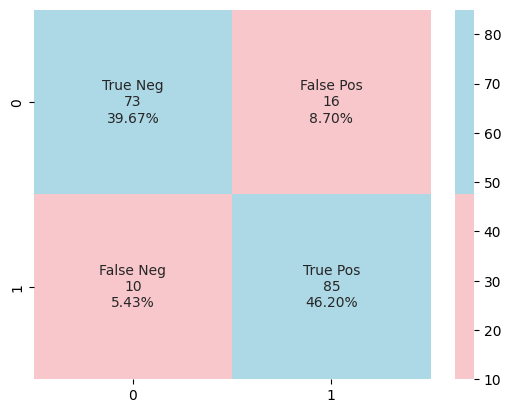

In [57]:
model_evaluation(knn_model) #without RestingECG and RestingBP

4. Naive Bayes:

In [65]:
from sklearn.naive_bayes import GaussianNB

In [75]:
model_nb = GaussianNB()

In [67]:
model_accuracy1(model_nb) #without RestingECG and RestingBP

Train Accuracy: 85.83%
Test Accuracy:  85.87%
Cross Validation Score:  91.36%
ROC_AUC Score:  85.75%


              precision    recall  f1-score   support

           0       0.87      0.82      0.84        89
           1       0.84      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



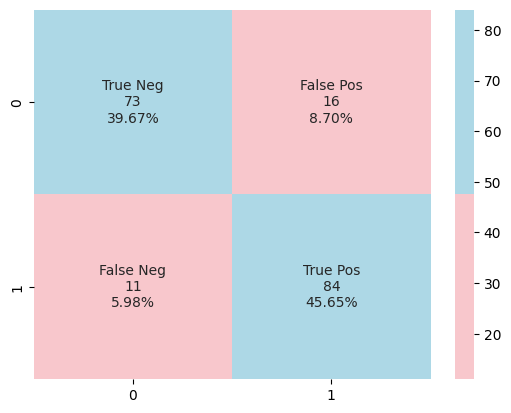

In [ ]:
model_evaluation(model_nb) #without RestingECG and RestingBP

In [72]:
model_accuracy2(model_nb) #without RestingBP

Train Accuracy: 85.69%
Test Accuracy:  85.33%
Cross Validation Score:  91.31%
ROC_AUC Score:  85.22%


In [73]:
model_accuracy3(model_nb) #without RestingECG

Train Accuracy: 86.10%
Test Accuracy:  85.87%
Cross Validation Score:  91.46%
ROC_AUC Score:  85.75%


In [76]:
model_accuracy4(model_nb) #with all 11 features

Train Accuracy: 86.24%
Test Accuracy:  85.33%
Cross Validation Score:  91.39%
ROC_AUC Score:  85.22%
